# Latar Belakang

Perusahaan VeriFone Inc.bergerak di bidang layanan jasa taxi di Newyork City. Memiliki data 'New York City TLC Trip Record' dimana data berisi data setiap trip taxi dari perusahaan tersebut

Stackholder disini adalah Manajer dari perusahaan Taxi VeriFone Inc.

# Permasalahan
Perusahaan ini ingin meningkatkan profit perusahaan dengan mengecek data 'New York City TLC Trip Record'.

Setelah dilihat dari data ternyata **ada permasalahan efesiensi lokasi pick up customer.**

Sebagai Data Analyst, kita akan mencoba menjawab pertanyaan berikut :

**Bagaimana cara meningkatkan profit perusahaan dan meningkatkan efesiensi lokasi pick up customer**

# Data 

Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N). 

1.	**VendorID** =  vendor atau perusahaan yang memiliki aplikasi taxi

2.	**lpep_pickup_datetime** = waktu pickup customer

3.	**lpep_dropoff_datetime** = waktu drop customer

4.	**store_and_fwd_flag** = 
- Y: Menunjukkan bahwa catatan perjalanan disimpan di memori kendaraan dan dikirim ke server kemudian (yaitu, perjalanan dengan metode "store and forward").
- N: Menunjukkan bahwa catatan perjalanan dikirim langsung ke server tanpa disimpan terlebih dahulu di memori kendaraan (yaitu, bukan perjalanan dengan metode "store and forward").

5.	**RatecodeID** = 
    - (1)	Standard rate (Tarif standar)
    - (2)	JFK (Kode tarif untuk perjalanan dari atau ke Bandara Internasional John F. Kennedy)
    - (3)	Newark (Kode tarif untuk perjalanan dari atau ke Bandara Internasional Newark Liberty)
    - (4)	Nassau or Westchester (Kode tarif untuk perjalanan ke Nassau atau Westchester di New York)
    - (5)	Negotiated fare (Tarif yang ditawar)
    - (6)	Group ride (Perjalanan kelompok)

6.	**PULocationID** = Lokasi taxi pick up customer

7.	**DOLocationID** = Lokasi taxi drop out 

8.	**passenger_count** = jumblah penumpang

9.	**trip_distance** = jarak tempuh selama perjalanan taksi dalam satuan mil dihitung menggunakan taximeter selama perjalanan berlangsung.

10.	**fare_amount** = MTA (Metropolitan Transportation Authority) tax sebesar $0,50 yang dikenakan pada tarif taksi di suatu daerah. MTA tax ini secara otomatis akan dikenakan berdasarkan tarif yang diukur oleh meteran pada kendaraan taksi yang digunakan selama perjalanan.

    MTA adalah sebuah badan transportasi yang bertanggung jawab atas sistem transportasi umum di daerah metropolitan di Amerika Serikat, termasuk di kota New York. Pada sistem transportasi tersebut, MTA tax sebesar $0,50 akan ditambahkan secara otomatis pada tarif taksi yang dihitung berdasarkan tarif meteran. Dalam hal ini, MTA tax merupakan biaya tambahan yang harus dibayar oleh pelanggan sebagai kontribusi untuk membiayai layanan transportasi umum di daerah tersebut.

11.	**mta_tax** = MTA tax adalah sebuah biaya tambahan yang dikenakan untuk mendukung layanan transportasi umum di daerah Metropolitan New York. Biaya tambahan sebesar $0,50 ini dikenakan pada setiap perjalanan taksi yang dilakukan di kota New York.

13.	**tip_amount** = besaran tip yang diberikan oleh penumpang

14.	**tolls_amount** = total biaya toll yang dibayarkan

15.	**improvement_surcharge** = ada biaya tambahan sebesar $0,30 yang dikenakan pada perjalanan taksi yang dipesan melalui sistem hail (mengangkat tangan sebagai tanda untuk memanggil taksi) pada saat penumpang naik ke dalam taksi

16.	**total_amount** = jumlah total biaya yang dibebankan kepada penumpang selama perjalanan taksi, dan tidak termasuk tips

17.	**payment_type** = tipe pembayaran
    - 1 = Credit card
    - 2 = Cash
    - 3 = No charge
    - 4 = Dispute
    - 5 = Unknown
    - 6 = Voided trip

18.	**trip_type** = 
    - 1 =  taksi dilakukan melalui penjemputan langsung (street hail), yaitu ketika penumpang menunjukkan minat untuk naik taksi dan pengemudi menyetujui untuk mengangkut mereka. 
    - 2 =  taksi dilakukan melalui panggilan dari pusat pengiriman taksi (dispatch), yaitu ketika penumpang memesan taksi melalui layanan panggilan atau aplikasi pemesanan taksi, dan pengemudi dipanggil untuk menjemput mereka.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from matplotlib import cm
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.colors as mcolors

style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('NYC TLC Trip Record.csv')
df.head()

C:\Users\dikaw\AppData\Local\Temp\ipykernel_19596\4010053463.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,68211.0,1.863028,0.343820,1.00,2.00,2.00,2.00,2.00
RatecodeID,63887.0,1.117160,1.372913,1.00,1.00,1.00,1.00,99.00
PULocationID,68211.0,98.549735,61.244314,1.00,74.00,75.00,129.00,265.00
DOLocationID,68211.0,138.429901,76.761311,1.00,74.00,138.00,219.00,265.00
passenger_count,63887.0,1.315870,0.979054,0.00,1.00,1.00,1.00,9.00
trip_distance,68211.0,8.114852,585.105955,0.00,1.11,1.85,3.21,120098.84
fare_amount,68211.0,16.603545,13.470121,-70.00,9.30,13.50,19.80,490.00
extra,68211.0,0.825431,1.269904,-2.50,0.00,0.00,1.00,12.50
mta_tax,68211.0,0.588340,0.385819,-0.50,0.50,0.50,0.50,2.75
tip_amount,68211.0,2.139012,3.052710,-10.50,0.00,1.60,3.33,222.22


In [5]:
df.describe(include=[object]).T

,count,unique,top,freq
lpep_pickup_datetime,68211,66575,2023-01-09 09:08:00,4
lpep_dropoff_datetime,68211,66519,2023-01-09 00:00:00,6
store_and_fwd_flag,63887,2,N,63579


In [6]:
# Find data Vendor Id 2 ( VeriFone Inc.) 
df = df[df['VendorID'] == 2]

# drop fariable VendorID, extra, ehail_fee, congestion_surcharge
df = df.drop(['VendorID','extra','ehail_fee','congestion_surcharge'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58868 entries, 0 to 68210
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lpep_pickup_datetime   58868 non-null  object 
 1   lpep_dropoff_datetime  58868 non-null  object 
 2   store_and_fwd_flag     54672 non-null  object 
 3   RatecodeID             54672 non-null  float64
 4   PULocationID           58868 non-null  int64  
 5   DOLocationID           58868 non-null  int64  
 6   passenger_count        54672 non-null  float64
 7   trip_distance          58868 non-null  float64
 8   fare_amount            58868 non-null  float64
 9   mta_tax                58868 non-null  float64
 10  tip_amount             58868 non-null  float64
 11  tolls_amount           58868 non-null  float64
 12  improvement_surcharge  58868 non-null  float64
 13  total_amount           58868 non-null  float64
 14  payment_type           54672 non-null  float64
 15  tr

# Hendle Data Duplicate

Tidak ada data yang duplicate

In [8]:
df.duplicated().value_counts()

False    58868
dtype: int64

# Hendle Data Datetime

In [9]:
# converting column to datetime

df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [10]:
# Check Columb Datetime

df[['lpep_pickup_datetime','lpep_dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58868 entries, 0 to 68210
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   58868 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  58868 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.3 MB


# Check Missing Value

In [11]:
df.isna().sum()

lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4196
RatecodeID               4196
PULocationID                0
DOLocationID                0
passenger_count          4196
trip_distance               0
fare_amount                 0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4196
trip_type                4196
dtype: int64

In [12]:
df.isna().sum()/len(df)*100

lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       7.127811
RatecodeID               7.127811
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          7.127811
trip_distance            0.000000
fare_amount              0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             7.127811
trip_type                7.127811
dtype: float64

<Figure size 1000x600 with 0 Axes>

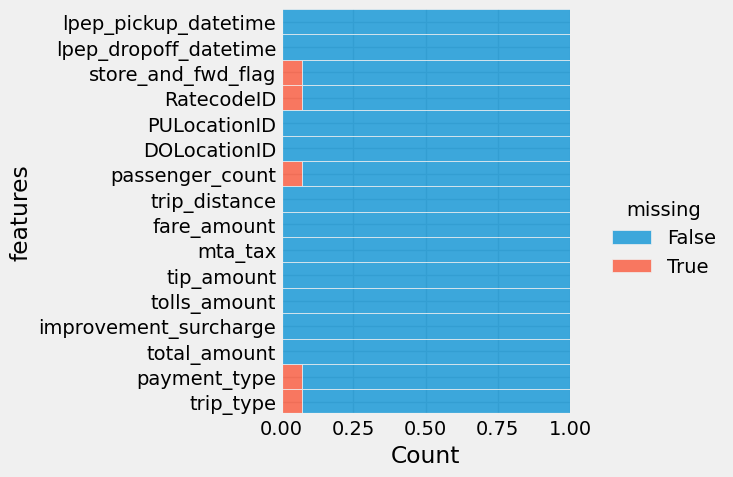

In [13]:
plt.figure(figsize=(10,6))
ax = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

ax.set(ylabel='features')
plt.show()

<Axes: >

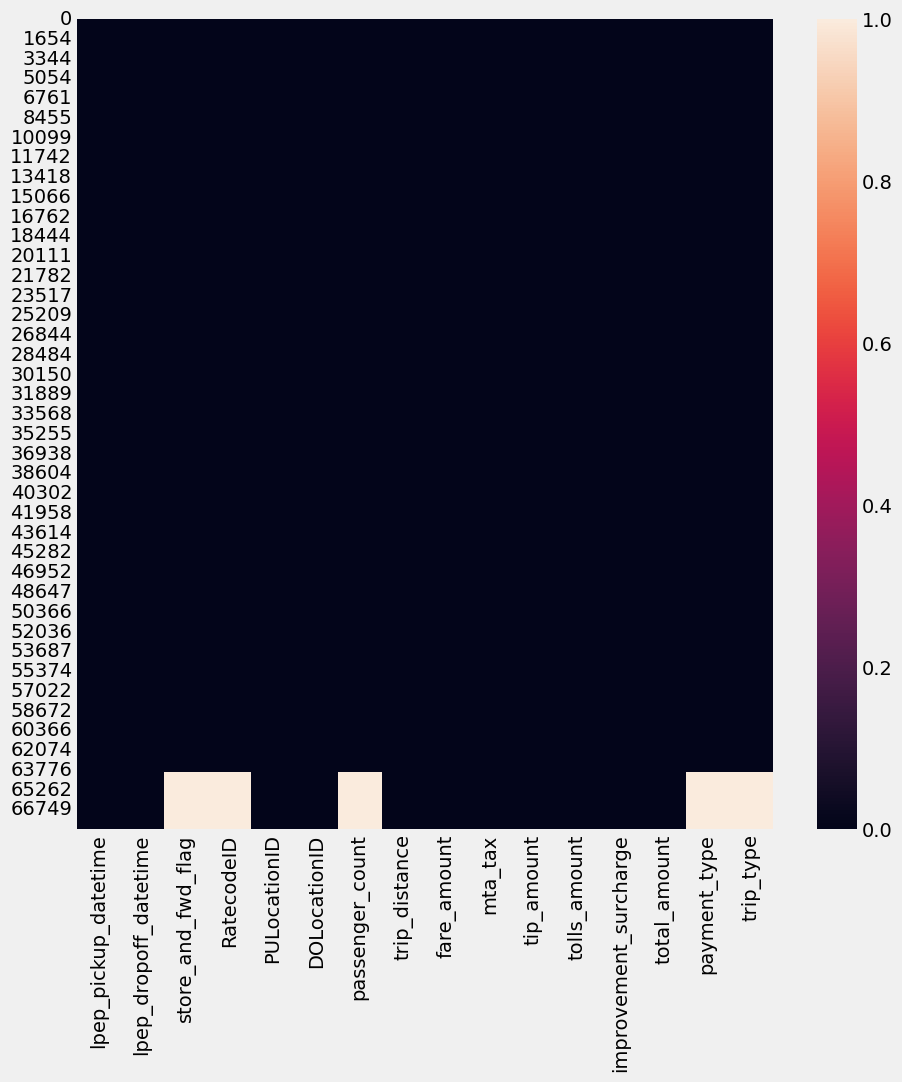

In [14]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

<Axes: >

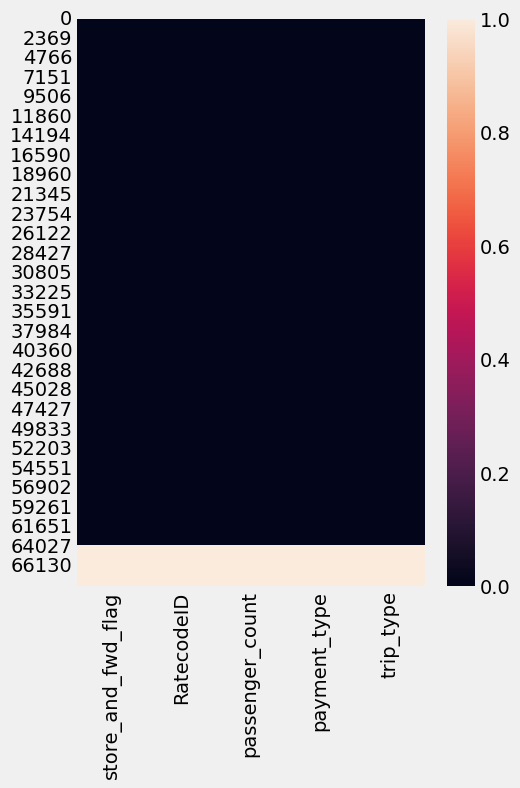

In [15]:
# Sebaran missing value di dalam data

plt.figure(figsize=(5,7))
sns.heatmap(df[['store_and_fwd_flag','RatecodeID','passenger_count','payment_type','trip_type']].isna())

Secara garis besar:  
* *missing value* berada di kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type` dan `trip_type` memiliki proporsi yang sedikit (<10%)

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini disarankan dalam kasus kita, karena jumlah missing value yang tergolong sedikit. Jika jumblah missing value relatif kecil dibandingkan dengan ukuran dataset, penghapusan missing value dapat meningkatkan akurasi analisis data dan model prediksi (cara yg dipakai)

* kedua, mengisi data yang hilang. Cara ini kurang disarankan. karena kita hanya sebatas menganalysist data (EDA) dan mencari insight dari data. namun jika data ini ingin dalanjutkan ke model ML. metode ini bisa dipertimbangkan untuk saat ML

In [16]:
# delate data nan 
df = df.dropna(axis=0)

In [17]:
# check data nan 
df.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
dtype: int64

# Hendle Categorikal Columb

In [18]:
# change data RatecodeID int to category and check it

df['RatecodeID'] = df['RatecodeID'].replace({1: 'Standard rate', 2: 'JFK', 3: 'Newark', 4: 'Nassau or Westchester', 5: 'Negotiated fare', 6: 'Group ride'})
df['RatecodeID'].value_counts()

Standard rate            53001
Negotiated fare           1451
JFK                        144
Nassau or Westchester       50
Newark                      26
Name: RatecodeID, dtype: int64

In [19]:
# change data payment_type int to category and check it

df['payment_type'] = df['payment_type'].replace({1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided trip'})
df['payment_type'].value_counts()

Credit card    34572
Cash           19758
No charge        278
Dispute           64
Name: payment_type, dtype: int64

In [20]:
# change data trip_type int to category and check it

df['trip_type'] = df['trip_type'].replace({1: 'Street-hail', 2: 'Dispatch'})
df['trip_type'].value_counts()

Street-hail    53332
Dispatch        1340
Name: trip_type, dtype: int64

In [21]:
# checking the categorical columns in the data 
cat_col = [col for col in df.columns if df[col].dtype == "object" ]
cat_col

['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type']

In [22]:
# checking the number columns in the data 
num_col = [col for col in df.columns if df[col].dtype == "float64" ] + [col for col in df.columns if df[col].dtype == "int64" ]
num_col

['passenger_count',
 'trip_distance',
 'fare_amount',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'PULocationID',
 'DOLocationID']

In [23]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Standard rate,166,143,1.0,2.58,14.9,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail
1,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Standard rate,24,43,1.0,1.81,10.7,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail
2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Standard rate,223,179,1.0,0.00,7.2,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail
5,2023-01-01 00:53:31,2023-01-01 01:11:04,N,Standard rate,41,262,1.0,2.78,17.7,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail
7,2023-01-01 00:11:58,2023-01-01 00:24:55,N,Standard rate,24,75,1.0,1.88,14.2,0.5,0.00,0.0,1.0,16.70,Cash,Street-hail


# Outlayer 

C:\Users\dikaw\AppData\Local\Temp\ipykernel_19596\2129179777.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(num_col), i+1)
C:\Users\dikaw\AppData\Local\Temp\ipykernel_19596\2129179777.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(num_col), i+1)


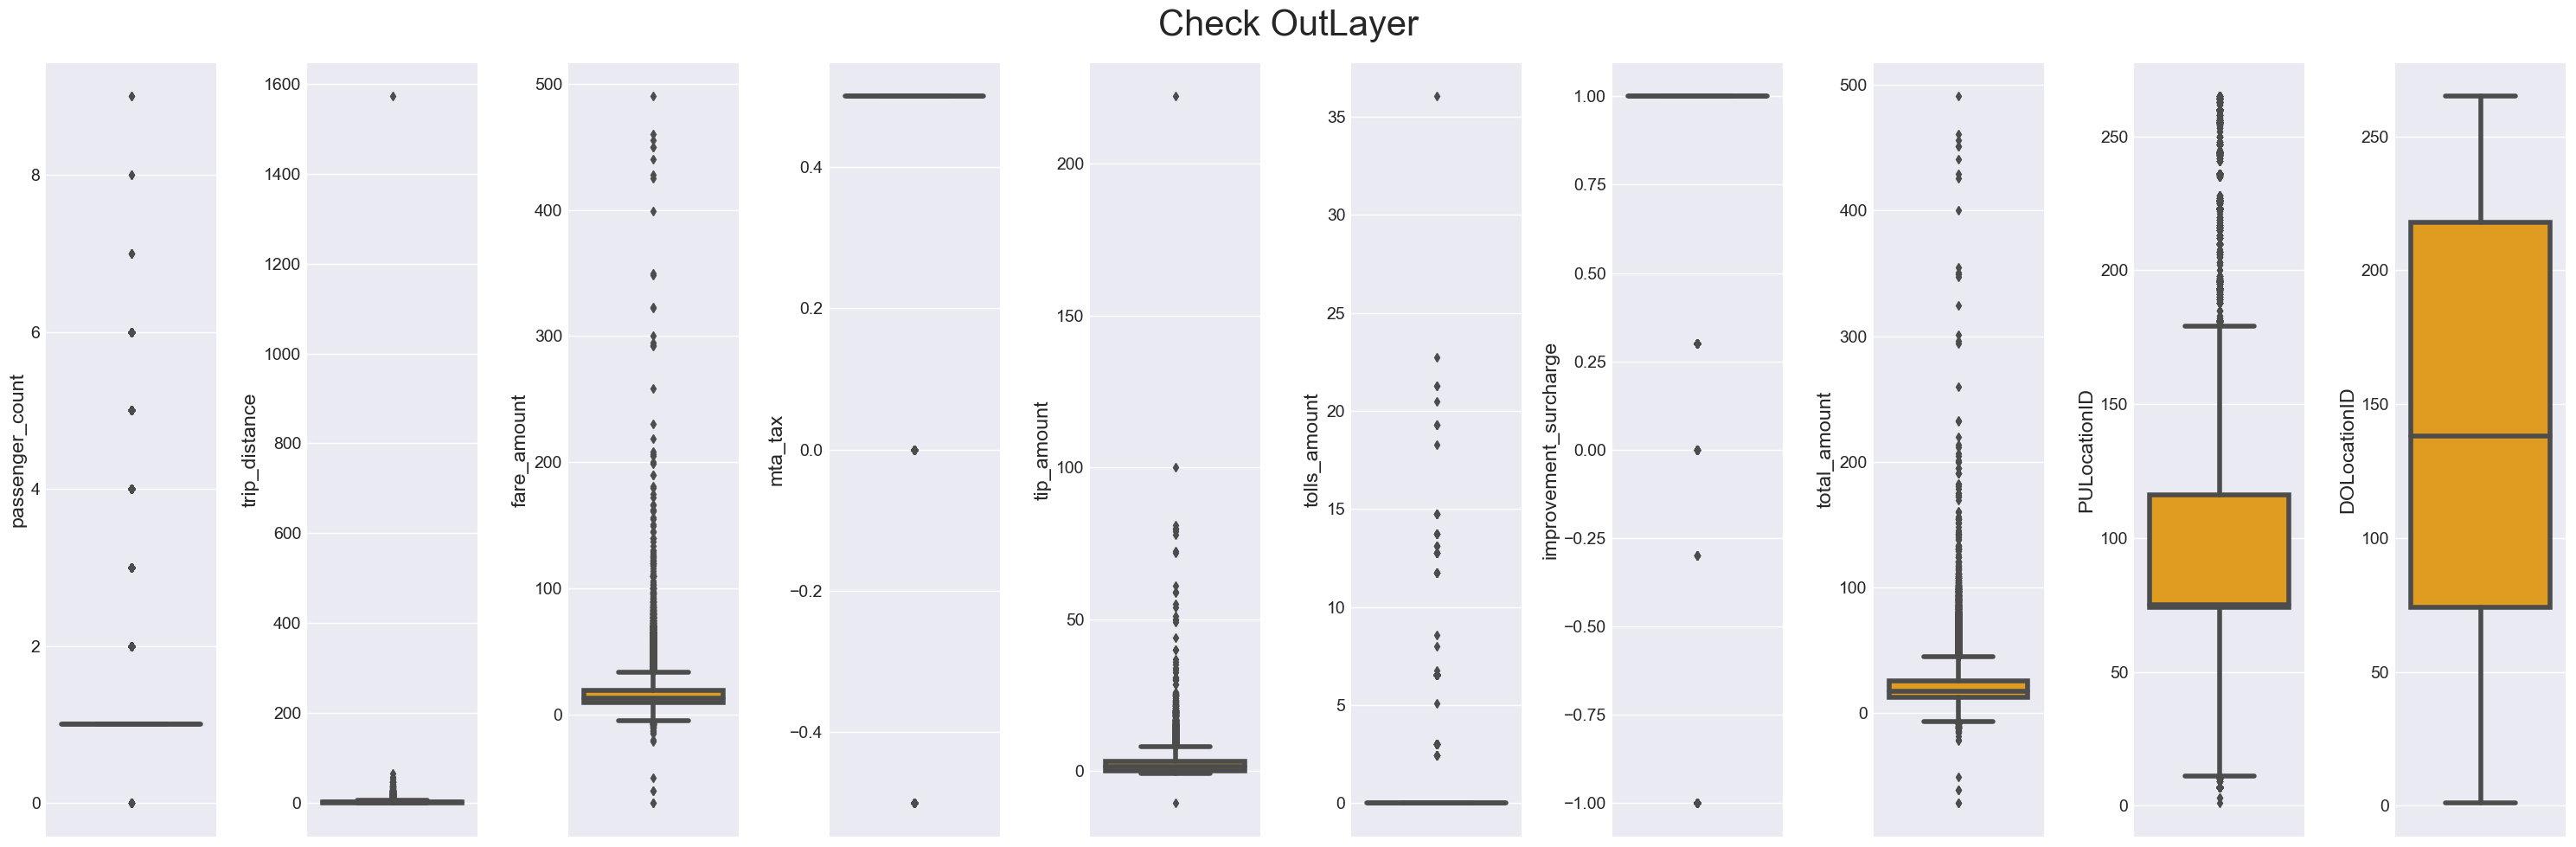

In [24]:
# Checking Outlayer
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(30,10))
fig.suptitle('Check OutLayer',fontsize=30)

for i in range(0, len(num_col)):
    plt.subplot(1, len(num_col), i+1)
    sns.boxplot(y=df[num_col[i]], color = 'orange', orient = 'v')
    plt.tight_layout()


In [25]:
df.to_excel('NYCTaxi.xlsx', index=False)

**Terdapat outlayer di semua data numurical** (`DOLocationID`,`PULocationID` tidak termasuk karena termasuk data kategori)

# Explore Analysis

## Minus Total amount

In [26]:
minus_total_amount =  df[df['total_amount']<0]
print (len (minus_total_amount))
print (len (minus_total_amount)/len(df)*100)

174
0.3182616330114135


**Ada data anomaly** dimana ada minus pendapatan dari driver Taxi `total_amount` 

In [27]:
df['payment_type'].value_counts()

Credit card    34572
Cash           19758
No charge        278
Dispute           64
Name: payment_type, dtype: int64

In [28]:
minus_total_amount['payment_type'].value_counts()

No charge    139
Dispute       32
Cash           3
Name: payment_type, dtype: int64

Trip yang memiliki minus pendapatan terdapat di pembayaran 
- `no charge` sekitar 50% dari total semua payment_type **'no charge'**
- `Dispute` sekitar 50% dari total semua payment_type **'Dispute'**

## Customer Location

In [29]:
df_loc = df['PULocationID'].value_counts().reset_index().rename(columns={'index':'PULocationID','PULocationID':'count'})
df_loc.head()

,PULocationID,count
0,74,10565
1,75,7679
2,95,3725
3,41,3341
4,166,3189


In [30]:
len(df_loc)

188

In [31]:
# kita bisa fokuskan menghindari untuk pick up customer di lokasi tersepi pick up untuk meningkatkan peluang mendapatnya customer
# ada banyak lokasi yang memiliki trip total di bawah 11 (tidak efesien)

df_loc_les10 = df_loc[df_loc['count']<11]
df_loc_les10 = df_loc_les10.groupby('count').count().reset_index().sort_values('PULocationID', ascending=False)
df_loc_les10['count'] = df_loc_les10['count'].astype(str)
df_loc_les10

,count,PULocationID
0,1,18
1,2,15
4,5,11
3,4,10
5,6,9
2,3,8
6,7,5
7,8,5
8,9,5
9,10,5


In [32]:
df_loc['PULocationID'][df_loc['count']>=11].sum()

13103

In [33]:
loc_les11_sum = df_loc['PULocationID'][df_loc['count']<11].count()
loc_gret11_sum = df_loc['PULocationID'][df_loc['count']>=11].count()

df_loc_gl11 = pd.DataFrame({
    'loc' : ['kurang dari 11','lebih dari 11'],
    'count' : [loc_les11_sum, loc_gret11_sum]
})



In [34]:
df_loc_gl11

,loc,count
0,kurang dari 11,91
1,lebih dari 11,97


In [35]:
df_loc['count'].median()

11.0

Dasar Treshold memakai median karena distribusi tidak normal

<function matplotlib.pyplot.show(close=None, block=None)>

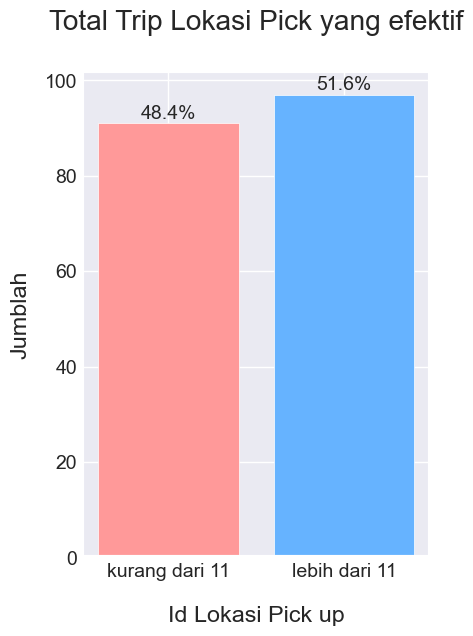

In [36]:
sns.set_style('darkgrid')
colors = ['#ff9999','#66b3ff']

plt.figure(figsize= (4, 6))
plt.title('Total Trip Lokasi Pick yang efektif',pad=30)
plt.xlabel('Id Lokasi Pick up',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumblah',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.15, 0.5)

plt.bar(df_loc_gl11['loc'], df_loc_gl11['count'], color = colors)

total = sum(df_loc_gl11['count'])
for i, v in enumerate(df_loc_gl11['count']):
    percent = v / total * 100
    plt.text(i, v + 1, f'{percent:.1f}%', ha='center')
    
plt.show

Insight : 
Terdapat banyak sekalai lokasi pick up yang tidak efesien sebesar 48%

In [37]:
# total location customer pick up

df['PULocationID'].nunique()

188

In [38]:
# total location customer drop out

df['DOLocationID'].nunique()

245

In [39]:
# kita bisa fokuskan untuk pick up customer di 10 lokasi teramai pick up untuk meningkatkan peluang mendapatnya customer 
df_toploc_pu =  df['PULocationID'].value_counts().head(10).reset_index().rename(columns={'index':'PULocationID','PULocationID':'count'})

df_toploc_pu['PULocationID'] = df_toploc_pu['PULocationID'].astype(str)

df_toploc_pu

,PULocationID,count
0,74,10565
1,75,7679
2,95,3725
3,41,3341
4,166,3189
5,82,2644
6,43,2638
7,97,1847
8,7,1708
9,42,1304


In [40]:
df['PULocationID'].value_counts().reset_index().rename(columns={'index':'PULocationID','PULocationID':'count'}).sum()

PULocationID    24838
count           54672
dtype: int64

In [41]:
df_toploc_pu['count'].sum()

38640

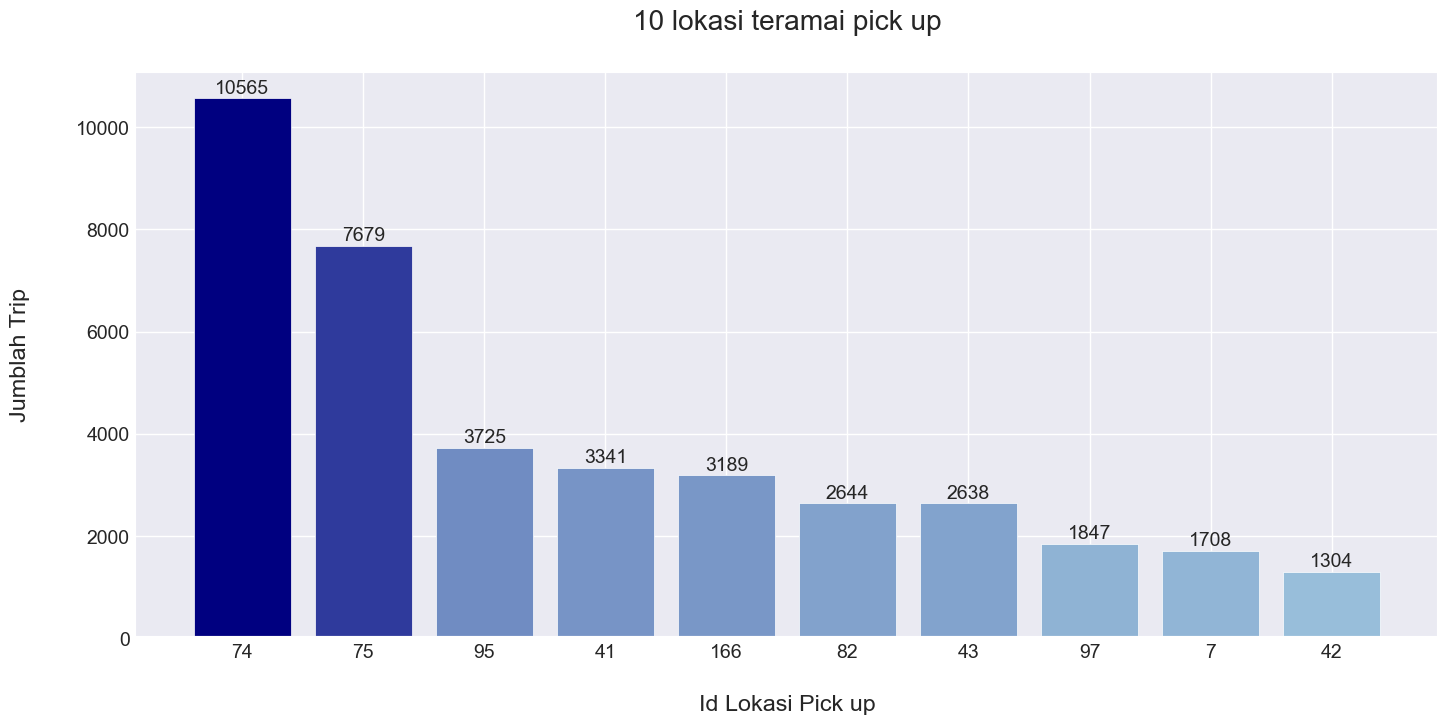

In [42]:
sns.set_style('darkgrid')
normalized_heights = np.array(df_toploc_pu['count']) / max(df_toploc_pu['count'])
color_start = 'lightblue'
color_end = 'Navy'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize= (15, 7))
plt.title('10 lokasi teramai pick up', pad=30)
plt.xlabel('Id Lokasi Pick up',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumblah Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.08, 0.5)

plt.bar(df_toploc_pu['PULocationID'], df_toploc_pu['count'], color=cmap(normalized_heights))

for i, value in enumerate(df_toploc_pu['count']):
    plt.text(i, value + 100, str(value), ha='center')


plt.show()

Insight : 
- Id Lokasi Pick up 74 memiliki banyak sekali Trip diatara yang lainnya

Recomendasion : 
- Direkomendasikan untuk mengalihkan taxi dan driver taxi ke lokasi-lokasi pick up yang ramai untuk meningkatkan efesiensi trip dan profit perusahaan 

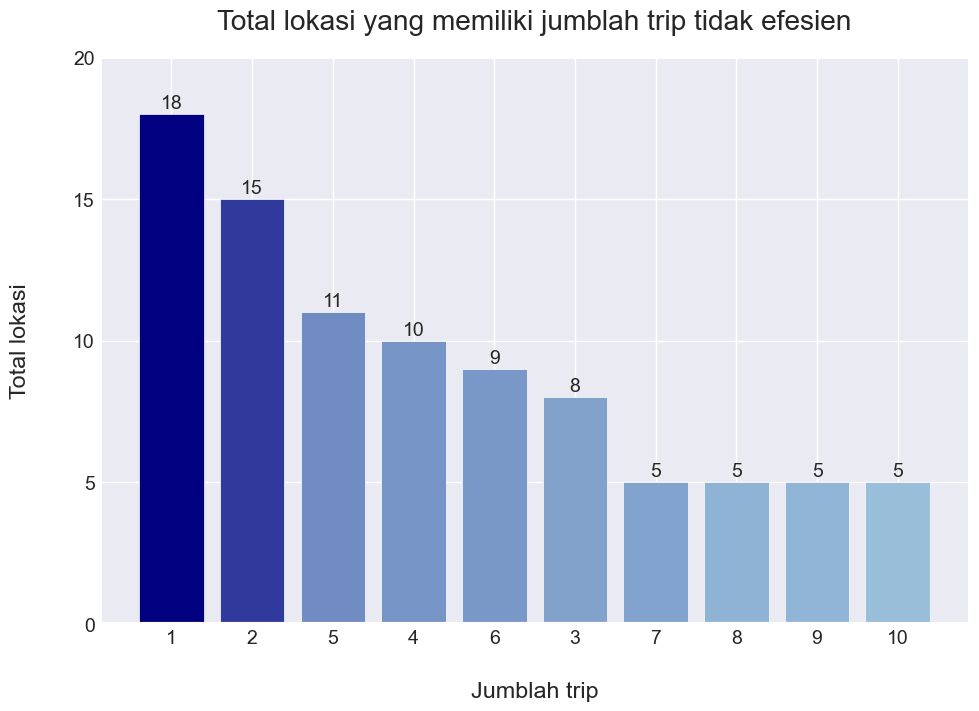

In [43]:
sns.set_style('darkgrid')

normalized_heights = np.array(df_toploc_pu['count']) / max(df_toploc_pu['count'])
color_start = 'lightblue'
color_end = 'Navy'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize= (10, 7))
plt.title('Total lokasi yang memiliki jumblah trip tidak efesien',pad=20)

plt.xlabel('Jumblah trip',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total lokasi',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.08, 0.5)

plt.bar(df_loc_les10['count'], df_loc_les10['PULocationID'], color=cmap(normalized_heights))
plt.ylim(0, 20)
plt.yticks(range(0, 21, 5))
for i, value in enumerate(df_loc_les10['PULocationID']):
    plt.text(i, value +0.2, str(value), ha='center')

plt.show()

Insight : 
- Lokasi yang memiliki jumblah trip 1x dan 2x sangatlah banyak

Recomendasion : 
- Direkomendasikan untuk taxi dan driver menghindari lokasi-lokasi yang sepi customer untuk meningkatkan efesiensi trip dan profit perusahaan 

## Trip Type

In [44]:
df_trip_type = df['trip_type'].value_counts().reset_index().rename(columns={'index':'trip_type','trip_type':'count'})

df_trip_type

,trip_type,count
0,Street-hail,53332
1,Dispatch,1340


<function matplotlib.pyplot.show(close=None, block=None)>

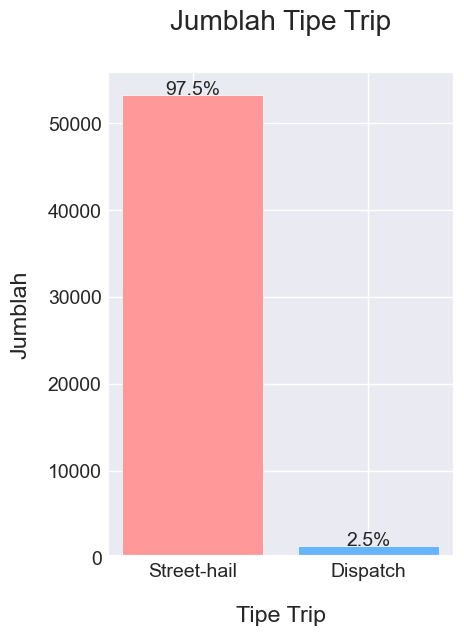

In [79]:
sns.set_style('darkgrid')
colors = ['#ff9999','#66b3ff']

plt.figure(figsize= (4, 6))
plt.title('Jumblah Tipe Trip',pad=30)
plt.xlabel('Tipe Trip',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumblah',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.22, 0.5)

plt.bar(df_trip_type['trip_type'], df_trip_type['count'], color = colors)

total = sum(df_trip_type['count'])
for i, v in enumerate(df_trip_type['count']):
    percent = v / total * 100
    plt.text(i, v + 1, f'{percent:.1f}%', ha='center')
    
plt.show

Insight : 
- Jumblah Trip Dispatch sangatlah sedikit sekali dibandingkan Street-hail

Recomendasion : 
- Perusahaan harus mulai meningkatkan peforma dan kualitas aplikasi taxi persusahaan untuk menaikkan profit dan efesiensi 
- Dengan meningkatkan peforma dan kualitas aplikasi taxi perusahaan juga akan bersaing ketat menarik customer dengan competitor seperti uber, ini sangat direkomendasikan agar perusahaan berbisnis mengikuti era teknologi sekarang.

## Trip_distance

In [46]:
trip_distance_0 = df[df['trip_distance']==0]
len(trip_distance_0)

1709

In [47]:
trip_distance_0.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Standard rate,223,179,1.0,0.0,7.2,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail
58,2023-01-01 00:57:15,2023-01-01 01:00:15,N,Standard rate,75,75,1.0,0.0,4.4,0.5,1.38,0.0,1.0,8.28,Credit card,Street-hail
99,2023-01-01 01:27:36,2023-01-01 01:27:43,N,Negotiated fare,168,168,0.0,0.0,20.0,0.0,0.00,0.0,1.0,21.00,Credit card,Dispatch
107,2023-01-01 01:11:13,2023-01-01 01:11:36,N,Standard rate,7,7,1.0,0.0,3.0,0.5,9.00,0.0,1.0,14.50,Credit card,Street-hail
115,2023-01-01 01:52:58,2023-01-01 01:53:00,N,Standard rate,264,264,1.0,0.0,3.0,0.5,21.50,0.0,0.3,26.30,Credit card,Street-hail


In [48]:
len(df)

54672

In [49]:
df_trip_dist0 = pd.DataFrame({
    'Trip_distance' : ['trip_distance_0','Normal'],
    'count' : [len(trip_distance_0),len(df)]
})
df_trip_dist0

,Trip_distance,count
0,trip_distance_0,1709
1,Normal,54672


<function matplotlib.pyplot.show(close=None, block=None)>

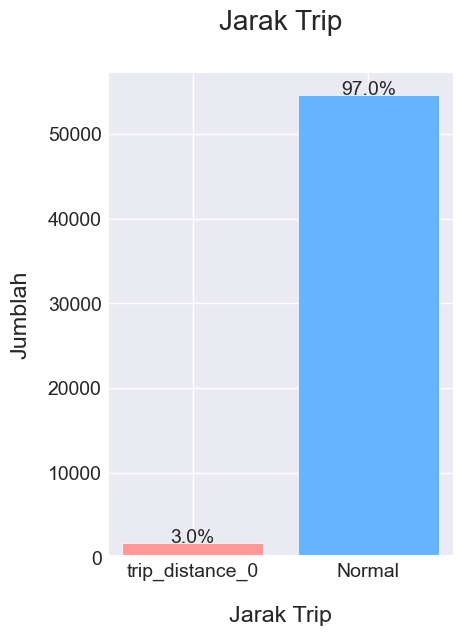

In [80]:
sns.set_style('darkgrid')
colors = ['#ff9999','#66b3ff']

plt.figure(figsize= (4, 6))
plt.title('Jarak Trip',pad=30)
plt.xlabel('Jarak Trip',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumblah',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.22, 0.5)

plt.bar(df_trip_dist0['Trip_distance'], df_trip_dist0['count'], color = colors)

total = sum(df_trip_dist0['count'])
for i, v in enumerate(df_trip_dist0['count']):
    percent = v / total * 100
    plt.text(i, v + 1, f'{percent:.1f}%', ha='center')
    
plt.show

Insight :
- Adanya data anomaly, yaitu Trip Distance 0 sebesar 3% dari data
- Adanya kemungkinan alat pengukur jarak di beberapa taxi rusak sehingga ada beberapa perjalanan taxi yg memiliki jarak pengantaran 0

Recomendasion :
- Direkomendasikan untuk mengecek dan menserfice berkala taxi untuk menghindari kemungkinan chaeting driver taxi, karene tidak terekamnya jarak antar

## Feature Time

In [51]:
from datetime import datetime

df['day'] = pd.to_datetime(df['lpep_pickup_datetime']).apply(lambda x: datetime.strftime(x, '%A'))


In [52]:
df_day = df['day'].value_counts().reset_index().rename(columns={'index':'day','day':'count'})
df_day

,day,count
0,Tuesday,9006
1,Thursday,8112
2,Friday,8000
3,Wednesday,7970
4,Monday,7904
5,Saturday,6939
6,Sunday,6741


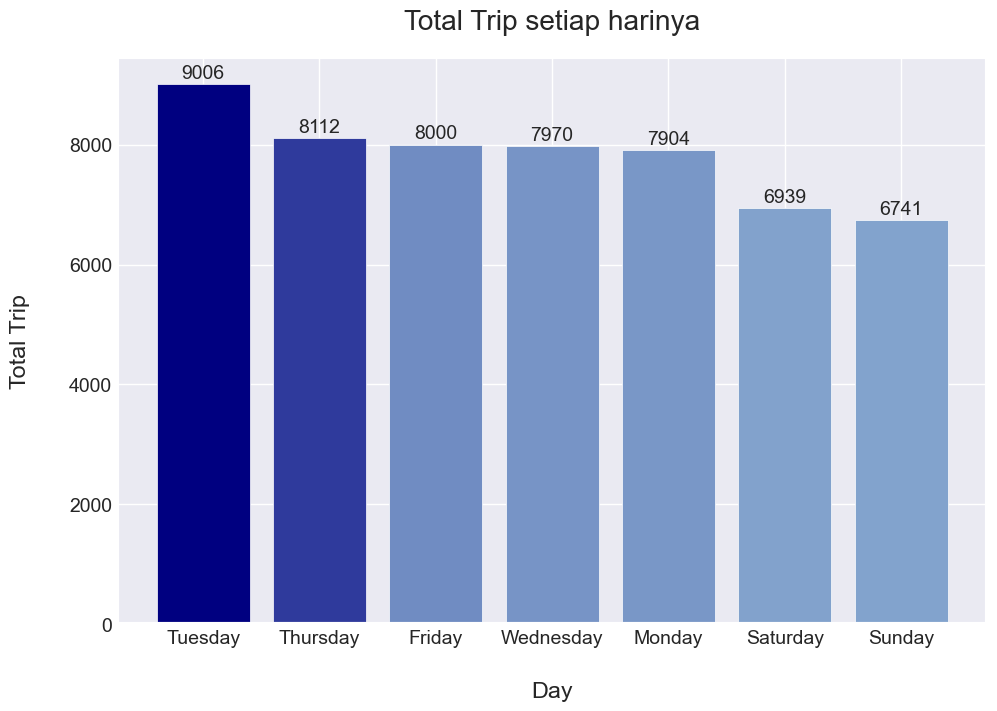

In [53]:
sns.set_style('darkgrid')

normalized_heights = np.array(df_toploc_pu['count']) / max(df_toploc_pu['count'])
color_start = 'lightblue'
color_end = 'Navy'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])


plt.figure(figsize= (10, 7))
plt.title('Total Trip setiap harinya',pad=20)
plt.xlabel('Day',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.1, 0.5)

plt.bar(df_day['day'], df_day['count'], color=cmap(normalized_heights))

for i, value in enumerate(df_day['count']):
    plt.text(i, value + 100, str(value), ha='center')

plt.show()

Insight :
- Hari selasa adalah teramai trip 

In [54]:
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df_hour = df['hour'].value_counts().reset_index().rename(columns={'index':'hour','hour':'count'}).sort_values('hour',ascending=True)
df_hour = df_hour.reset_index(drop=True)
df_hour

,hour,count
0,0,947
1,1,740
2,2,518
3,3,470
4,4,346
5,5,313
6,6,690
7,7,1971
8,8,2446
9,9,2651


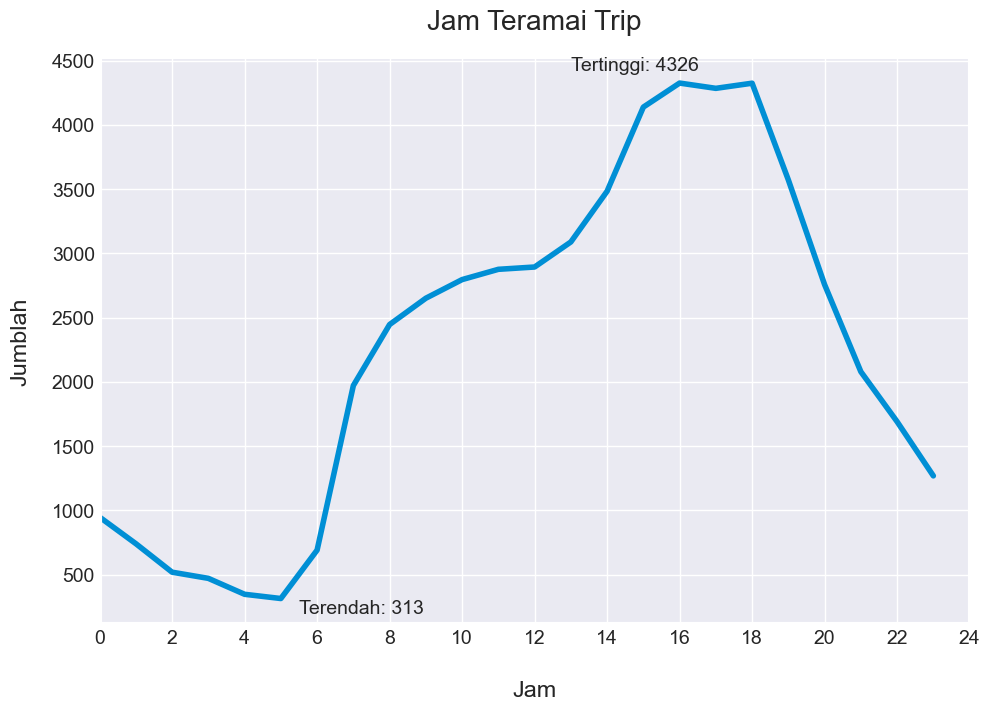

In [55]:
# direkomendasikan agar memperbanyak kertersedian taxi di jam jam yg paling ramai Trip
sns.set_style('darkgrid')
fig = plt.figure(figsize = (10,7)) #image size
plt.plot(df_hour['hour'],df_hour['count'])

plt.title('Jam Teramai Trip',pad=20)
plt.xlabel('Jam',labelpad=20) 
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumblah',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.08, 0.5)

plt.xlim(0, 24)
plt.xticks(range(0, 25, 2))

max_value = max(df_hour['count'])
min_value = min(df_hour['count'])

max_val = df_hour[df_hour['count'] == max_value]
min_val = df_hour[df_hour['count'] == min_value]

plt.annotate(f'Tertinggi: {max_value}', (max_val['hour'], max_val['count']),
             xytext=(max_val['hour']-3, max_val['count']+ 100))

plt.annotate(f'Terendah: {min_value}', (min_val['hour'], min_val['count']),
             xytext=(min_val['hour']+0.5, min_val['count']-120))


plt.show()


Insight :
- Jam trip teramai berada di jam 12 sampai 20
- Jam tersepi trip berada di jam 0 sampai 6

Recomendasion :
- Perusahaan bisa mengalokasikan sebagian taxi dan driver taxi pada jam-jam sepi trip seperti jam 0 - 6, dan memfokuskan untuk memperbanyak taxi dan driver taxi pada jam-jam dan hari ramai trip seperti di hari selasa pada jam 12 - 20

In [56]:
from math import ceil

df['duration']=df['lpep_dropoff_datetime']-df['lpep_pickup_datetime']
df['duration'].head()

# menghitung total menit dari durasi dan mengenapkan detik ke atas
df['duration_minutes'] = df['duration'].apply(lambda x: ceil(x.total_seconds() / 60))
df['duration_minutes']


0        12
1         7
2         7
5        18
7        13
         ..
63882     8
63883    11
63884     7
63885    10
63886    10
Name: duration_minutes, Length: 54672, dtype: int64

## passenger_count >4 and <=4

In [57]:
df_psg = df['passenger_count'].value_counts().reset_index().rename(columns={'index':'passenger_count','passenger_count':'count'})
df_psg['passenger_count'] = df_psg['passenger_count'].astype(int)
df_psg['passenger_count'] = df_psg['passenger_count'].astype(str)
df_psg

,passenger_count,count
0,1,46465
1,2,4257
2,5,1761
3,6,1049
4,3,779
5,4,329
6,0,24
7,7,4
8,9,2
9,8,2


In [58]:
df_psg['passenger_count'] = df_psg['passenger_count'].astype(int)
psg_g4 = df_psg['count'][df_psg['passenger_count']>4].sum()
psg_l4 = df_psg['count'][df_psg['passenger_count']<=4].sum()

print(psg_g4)
print(psg_l4)

2818
51854


In [59]:
df_psg['passenger_count'] = df_psg['passenger_count'].astype(str)

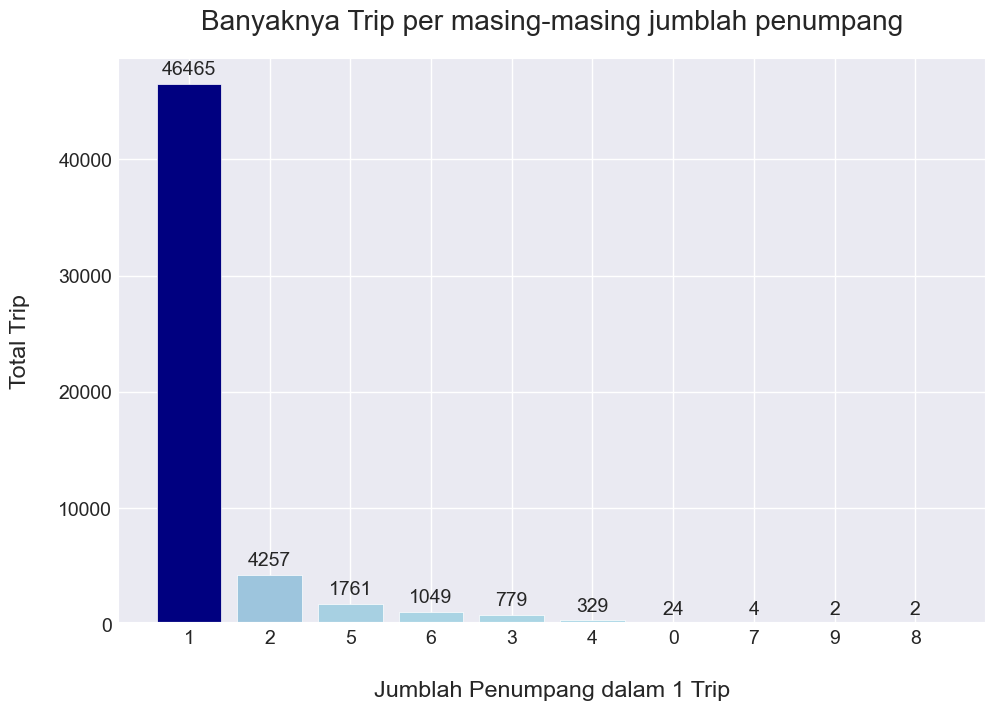

In [93]:
sns.set_style('darkgrid')
normalized_heights = np.array(df_psg['count']) / max(df_psg['count'])
color_start = 'lightblue'
color_end = 'Navy'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])


plt.figure(figsize= (10, 7))
plt.title('Banyaknya Trip per masing-masing jumblah penumpang',pad=20)
plt.xlabel('Jumblah Penumpang dalam 1 Trip',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.1, 0.5)

plt.bar(df_psg['passenger_count'], df_psg['count'], color=cmap(normalized_heights))

for i, value in enumerate(df_psg['count']):
    plt.text(i, value + 800, str(value), ha='center')

plt.show()

insight : 
- Jumblah penumpang 1 per 1x Trip sangatlah banyak sebesar 46000 orang

In [61]:
df_psg_gl = pd.DataFrame({
    'passenger' : ['great4','less4'],
    'count' : [2818,51854]
})
df_psg_gl

,passenger,count
0,great4,2818
1,less4,51854


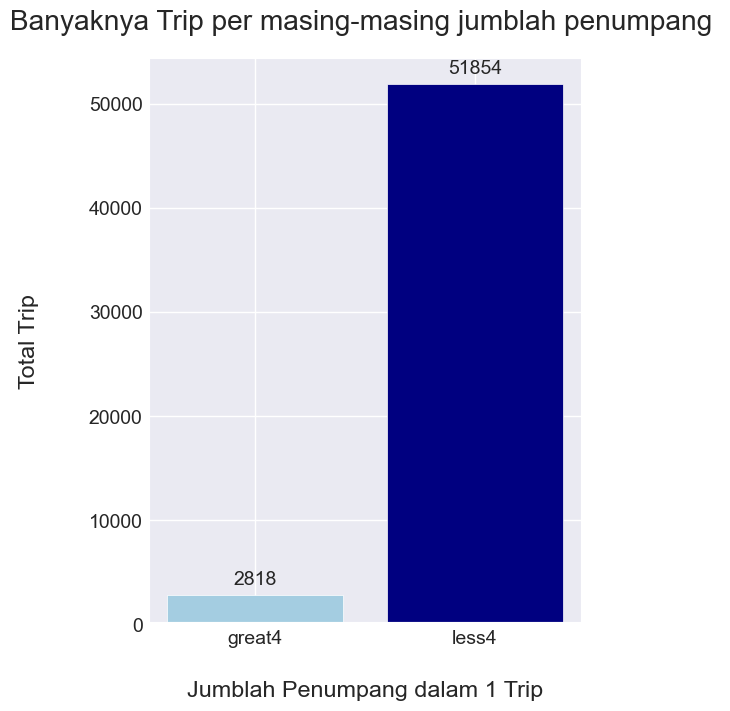

In [90]:
# Menghitung skala warna berdasarkan nilai
normalized_heights = np.array(df_psg_gl['count']) / max(df_psg_gl['count'])
color_start = 'lightblue'
color_end = 'Navy'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])


plt.figure(figsize= (5, 7))
plt.title('Banyaknya Trip per masing-masing jumblah penumpang ',pad=20)
plt.xlabel('Jumblah Penumpang dalam 1 Trip',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.25, 0.5)

plt.bar(df_psg_gl['passenger'], df_psg_gl['count'], color=cmap(normalized_heights))

for i, value in enumerate(df_psg_gl['count']):
    plt.text(i, value + 1000, str(value), ha='center')

plt.show()

Insight : 
- Terdapat juga jumblah penumpang >4 (adanya mobil kapasitas >4) walaupun tidak banyak


In [63]:
df['passenger_count'] = df['passenger_count'].astype(int)
df_locpas_g4 = df[['PULocationID']] [df['passenger_count']>4].value_counts().reset_index().head(10).rename(columns={0:'count'})
df_locpas_g4['PULocationID'] = df_locpas_g4['PULocationID'].astype(str)
df_locpas_g4

,PULocationID,count
0,74,576
1,75,570
2,166,186
3,95,183
4,41,152
5,43,145
6,244,128
7,82,117
8,260,98
9,7,81


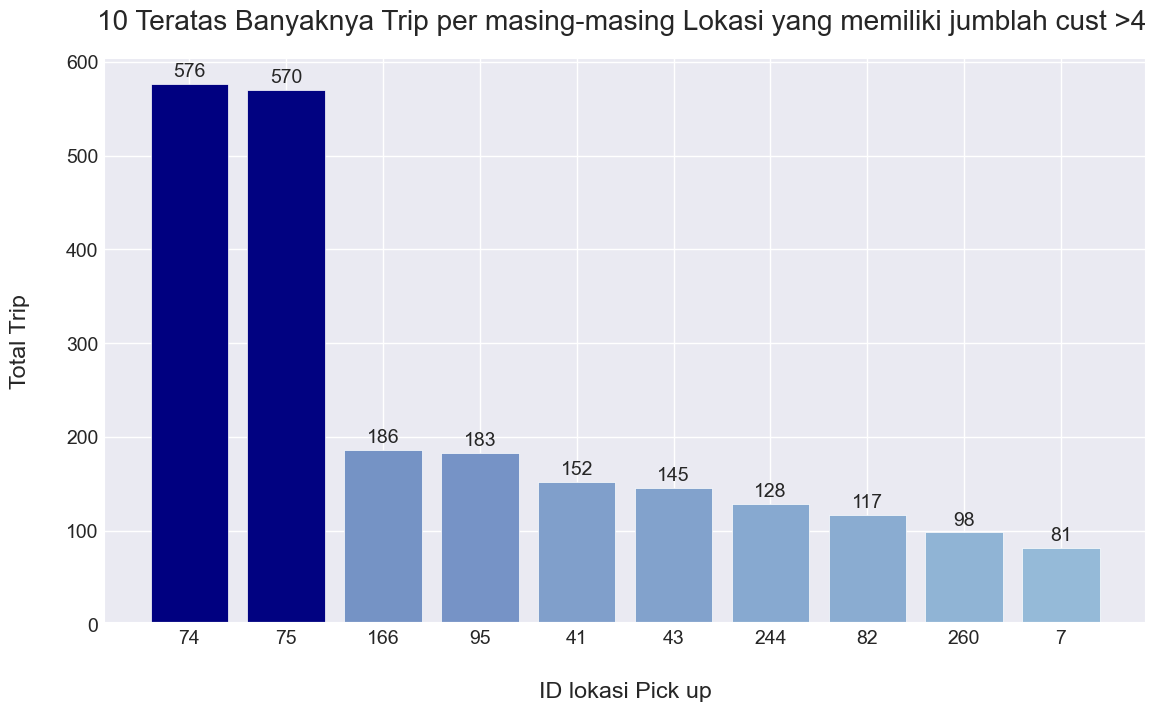

In [86]:
# lokasi PU customer pass >4

# Menghitung skala warna berdasarkan nilai
normalized_heights = np.array(df_locpas_g4['count']) / max(df_locpas_g4['count'])
color_start = 'lightblue'
color_end = 'Navy'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])


plt.figure(figsize= (12, 7))

plt.title('10 Teratas Banyaknya Trip per masing-masing Lokasi yang memiliki jumblah cust >4 ', pad=20)
plt.xlabel('ID lokasi Pick up',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.07, 0.5)

plt.bar(df_locpas_g4['PULocationID'], df_locpas_g4['count'], color=cmap(normalized_heights))

for i, value in enumerate(df_locpas_g4['count']):
    plt.text(i, value + 8, str(value), ha='center')

plt.show()

Insight : 
- ID lokasi 74 dan 75 adalah lokasi yang memiliki jumblah trip terbanyak dengan jumblah customer lebih dari 4 per sekali trip'nya

Rekomendasi : 
- Kita bisa fokuskan untuk Taxi dengan kapasitas 4> berada di titik lokasi lokasi ini
- dan kita bisa menaikkan biaya taxi khusus untuk layanan customer dengan jumblah customer lebih dari 4

## Income

In [65]:
df.sample()

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,day,hour,duration,duration_minutes
46424,2023-01-23 21:27:21,2023-01-23 21:33:55,N,Standard rate,74,42,1,1.2,8.6,0.5,0.0,0.0,1.0,11.1,Credit card,Street-hail,Monday,21,0 days 00:06:34,7


In [66]:
income_per_year = df.groupby(df['lpep_dropoff_datetime'].dt.year)['total_amount'].sum()

In [67]:
income_per_year

lpep_dropoff_datetime
2009         43.20
2022         52.40
2023    1161193.25
Name: total_amount, dtype: float64

In [68]:
income_per_month = df.groupby(df['lpep_dropoff_datetime'].dt.month)['total_amount'].sum()

In [69]:
income_per_month

lpep_dropoff_datetime
1     1160925.59
2         310.86
12         52.40
Name: total_amount, dtype: float64

In [70]:
df_amount_2023 = df[['lpep_dropoff_datetime','total_amount']][df['lpep_dropoff_datetime'].dt.year == 2023]
df_amount_2023

,lpep_dropoff_datetime,total_amount
0,2023-01-01 00:37:11,24.18
1,2023-01-01 00:57:49,15.84
2,2023-01-01 00:41:32,11.64
5,2023-01-01 01:11:04,22.95
7,2023-01-01 00:24:55,16.70
...,...,...
63882,2023-01-31 23:17:21,17.30
63883,2023-01-31 23:17:03,19.20
63884,2023-01-31 23:23:04,14.16
63885,2023-01-31 23:38:50,22.50


In [71]:
len(df)

54672

In [72]:
df_amount_01_2023 = df_amount_2023[df_amount_2023['lpep_dropoff_datetime'].dt.month == 1]
df_amount_01_2023

,lpep_dropoff_datetime,total_amount
0,2023-01-01 00:37:11,24.18
1,2023-01-01 00:57:49,15.84
2,2023-01-01 00:41:32,11.64
5,2023-01-01 01:11:04,22.95
7,2023-01-01 00:24:55,16.70
...,...,...
63882,2023-01-31 23:17:21,17.30
63883,2023-01-31 23:17:03,19.20
63884,2023-01-31 23:23:04,14.16
63885,2023-01-31 23:38:50,22.50


Ada perbedaan total amount----------------------------------------------------------------------

In [73]:
df_weekly = df_amount_01_2023[['lpep_dropoff_datetime','total_amount']]

df_weekly['lpep_dropoff_datetime'] = pd.to_datetime(df_weekly['lpep_dropoff_datetime'])

weekly_income = df_weekly.groupby(pd.Grouper(key='lpep_dropoff_datetime', freq='W-MON')).sum().reset_index()
weekly_income['lpep_dropoff_datetime'] = weekly_income['lpep_dropoff_datetime'].astype(str)
weekly_income

,lpep_dropoff_datetime,total_amount
0,2023-01-02,51483.72
1,2023-01-09,260190.50
2,2023-01-16,260546.01
3,2023-01-23,271799.21
4,2023-01-30,276942.30
5,2023-02-06,39920.65


In [74]:
weekly_income = weekly_income.iloc[1:5]


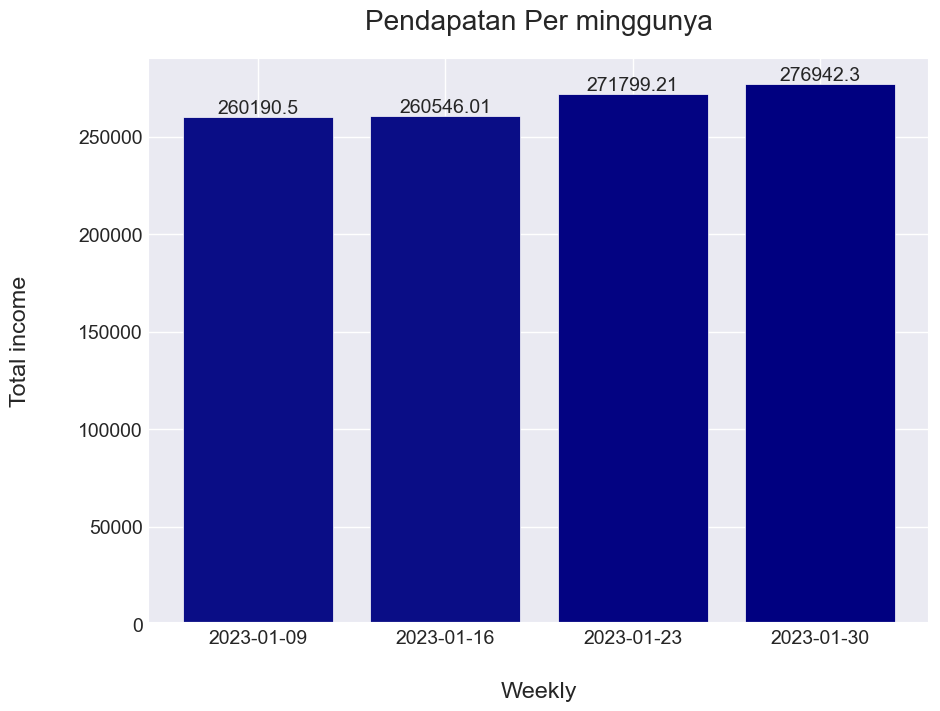

In [95]:
normalized_heights = np.array(weekly_income['total_amount']) / max(weekly_income['total_amount'])
color_start = 'lightblue'
color_end = 'Navy'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize= (9, 7))

plt.bar(weekly_income['lpep_dropoff_datetime'], weekly_income['total_amount'], color=cmap(normalized_heights))

plt.title('Pendapatan Per minggunya',pad=20)
plt.xlabel('Weekly',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total income',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.15, 0.5)


for i, value in enumerate(weekly_income['total_amount']):
    plt.text(i, value + 2000, str(value), ha='center')

plt.show()

Insight : 
- Adaya sedikit peningkatan income setiap minggu'nya pada bulan January 2023

# Insight and Recomendasion

Insight :
- Terdapat banyak sekalai lokasi pick up yang tidak efesien sebesar 48%
- Id Lokasi Pick up 74 memiliki banyak sekali Trip diatara yang lainnya
- Lokasi yang memiliki jumblah trip 1x dan 2x sangatlah banyak
- Jumblah Trip Dispatch sangatlah sedikit sekali (2,5%) dibandingkan Street-hail
- Adanya data anomaly, yaitu Trip Distance 0 sebesar 3% dari data, kemungkinan alat pengukur jarak di beberapa taxi rusak sehingga ada beberapa perjalanan taxi yg memiliki jarak pengantaran 0
- Hari selasa adalah teramai trip dan yang tersepi adalah minggu
- Jam trip teramai berada di jam 12 sampai 20 dan Jam tersepi trip berada di jam 0 sampai 6
- Perusahaan bisa mengalokasikan sebagian taxi dan driver taxi pada jam-jam sepi trip seperti jam 0 - 6, dan memfokuskan untuk memperbanyak taxi dan driver taxi pada jam-jam dan hari ramai trip seperti di hari selasa pada jam 12 - 20
- Jumblah penumpang 1 per 1x Trip  sangatlah banyak sebesar 46000 orang
- Terdapat juga jumblah penumpang >4 (adanya mobil kapasitas >4) walaupun tidak banyak (2818)
- ID lokasi 74 dan 75 adalah lokasi yang memiliki jumblah trip terbanyak dengan jumblah customer lebih dari 4 per sekali trip'nya
- Adaya sedikit peningkatan income setiap minggu'nya pada bulan January 2023


Recomendasion :
- Direkomendasikan untuk mengalihkan taxi dan driver taxi ke lokasi-lokasi pick up yang ramai untuk meningkatkan efesiensi trip dan profit perusahaan
- Direkomendasikan untuk taxi dan driver menghindari lokasi-lokasi yang sepi customer untuk meningkatkan efesiensi trip dan profit perusahaan 
- Perusahaan harus mulai meningkatkan peforma dan kualitas aplikasi taxi persusahaan untuk menaikkan profit dan efesiensi 
- Dengan meningkatkan peforma dan kualitas aplikasi taxi perusahaan juga akan bersaing ketat menarik customer dengan competitor seperti uber, ini sangat direkomendasikan agar perusahaan berbisnis mengikuti era teknologi sekarang.
- Kita bisa fokuskan untuk Taxi dengan kapasitas >4 berada di titik lokasi 74 dan 75 untuk melayani customer yang membutuhkan kapatitas taxi >4 orang
- Kita bisa menaikkan biaya taxi khusus untuk layanan customer dengan jumblah customer lebih dari 4 untuk menaikkan profit perusahaan


